In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
os.makedirs('figures/mem_speed', exist_ok=True)

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("experiment_results.csv")
df['layer_strateg_map'] = df['layer_strategy'].map({'zero': 0, '1/4': 1, '1/2': 2, '3/4': 3, 'all': 4})
df = df.sort_values(by = ['output_tokens','layer_strateg_map','q_bits'])
df = df.query('output_tokens != 20000')
df = df.drop(columns=['layer_strateg_map']).reset_index(drop=True)
df

,model_name,output_tokens,layer_strategy,q_bits,vram_consumption,inference_time
0,meta-llama/Llama-2-7b-chat-hf,100,zero,NaN,110.0,7.174196
1,meta-llama/Llama-2-7b-chat-hf,100,1/4,2.0,92.0,8.397351
2,meta-llama/Llama-2-7b-chat-hf,100,1/4,4.0,95.0,8.644723
3,meta-llama/Llama-2-7b-chat-hf,100,1/2,2.0,71.0,8.795890
4,meta-llama/Llama-2-7b-chat-hf,100,1/2,4.0,77.0,8.709040
5,meta-llama/Llama-2-7b-chat-hf,100,3/4,2.0,50.0,9.445451
6,meta-llama/Llama-2-7b-chat-hf,100,3/4,4.0,59.0,9.241030
7,meta-llama/Llama-2-7b-chat-hf,100,all,2.0,34.0,10.132930
8,meta-llama/Llama-2-7b-chat-hf,100,all,4.0,41.0,10.044821
9,meta-llama/Llama-2-7b-chat-hf,1000,zero,NaN,566.0,23.905058


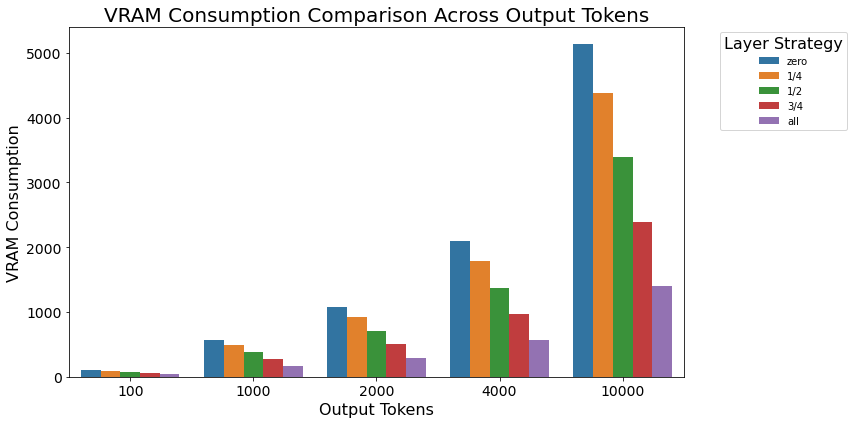

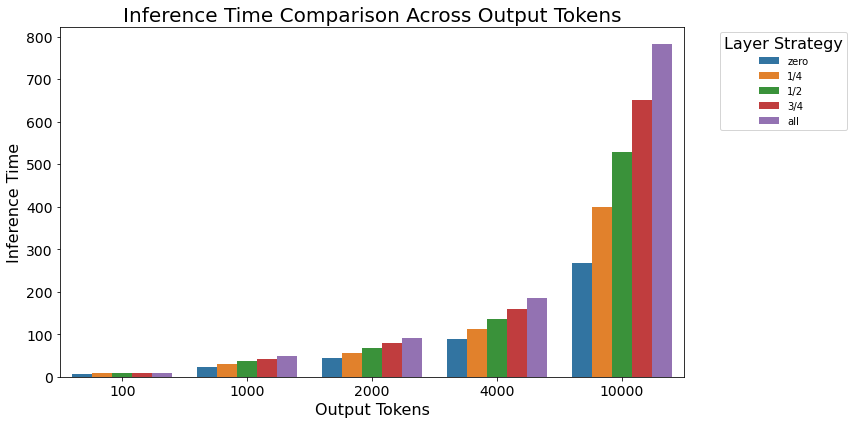

In [3]:
# VRAM Consumption comparison
plt.figure(figsize=(12, 6))
sns.barplot(x='output_tokens', y='vram_consumption', hue='layer_strategy', data=df, ci=None)
plt.title('VRAM Consumption Comparison Across Output Tokens', fontsize = 20)
plt.xlabel('Output Tokens', fontsize = 16)
plt.ylabel('VRAM Consumption', fontsize = 16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(title='Layer Strategy', bbox_to_anchor=(1.05, 1), loc='upper left', title_fontsize='16')
plt.tight_layout()
plt.savefig('figures/mem_speed/01_vram_consumption_output_tokens.png', facecolor='white', transparent=False)
plt.show()

# Inference Time comparison
plt.figure(figsize=(12, 6))
sns.barplot(x='output_tokens', y='inference_time', hue='layer_strategy', data=df, ci=None)
plt.title('Inference Time Comparison Across Output Tokens', fontsize = 20)
plt.xlabel('Output Tokens', fontsize = 16)
plt.ylabel('Inference Time', fontsize = 16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(title='Layer Strategy', bbox_to_anchor=(1.05, 1), loc='upper left', title_fontsize='16')
plt.tight_layout()
plt.savefig('figures/mem_speed/01_inference_time_output_tokens.png', facecolor='white', transparent=False)
plt.show()

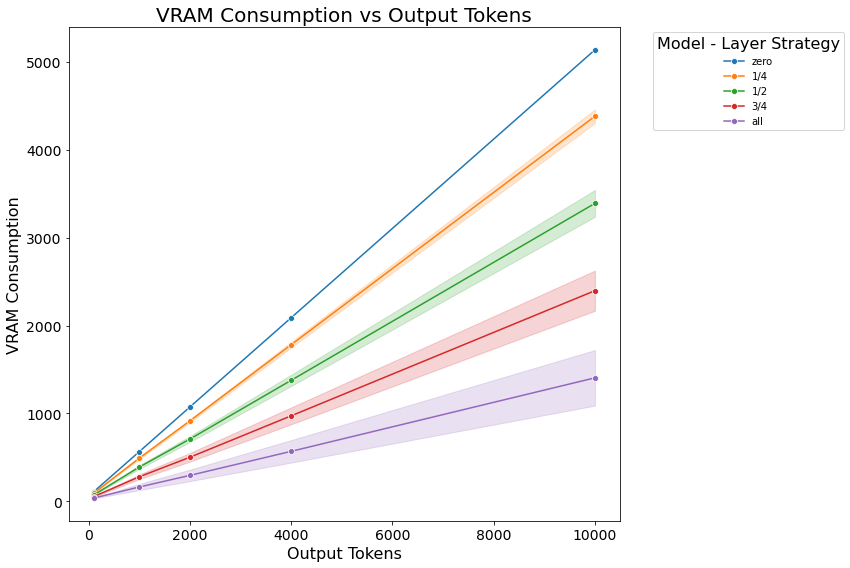

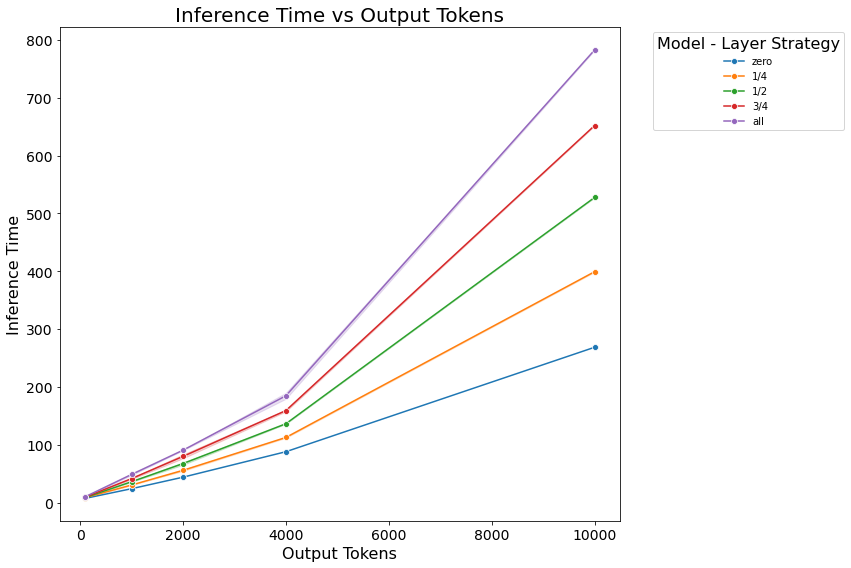

In [4]:
# VRAM Consumption vs Output Tokens
plt.figure(figsize=(12, 8))
for strategy in df['layer_strategy'].unique():
    strategy_data = df[df['layer_strategy'] == strategy]
    sns.lineplot(x='output_tokens', y='vram_consumption', 
                    data=strategy_data, marker='o', 
                    label=f"{strategy}")

plt.title('VRAM Consumption vs Output Tokens', fontsize = 20)
plt.xlabel('Output Tokens', fontsize = 16)
plt.ylabel('VRAM Consumption', fontsize = 16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(title='Model - Layer Strategy', bbox_to_anchor=(1.05, 1), loc='upper left', title_fontsize='16')
plt.tight_layout()
plt.savefig('figures/mem_speed/02_vram_consumption_vs_output_tokens.png', facecolor='white', transparent=False)
plt.show()

# Inference Time vs Output Tokens
plt.figure(figsize=(12, 8))
for strategy in df['layer_strategy'].unique():
    strategy_data = df[df['layer_strategy'] == strategy]

    sns.lineplot(x='output_tokens', y='inference_time', 
                    data=strategy_data, marker='o', 
                    label=f"{strategy}")

plt.title('Inference Time vs Output Tokens', fontsize = 20)
plt.xlabel('Output Tokens', fontsize = 16)
plt.ylabel('Inference Time', fontsize = 16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(title='Model - Layer Strategy', bbox_to_anchor=(1.05, 1), loc='upper left', title_fontsize='16')
plt.tight_layout()
plt.savefig('figures/mem_speed/02_inference_time_vs_output_tokens.png', facecolor='white', transparent=False)
plt.show()

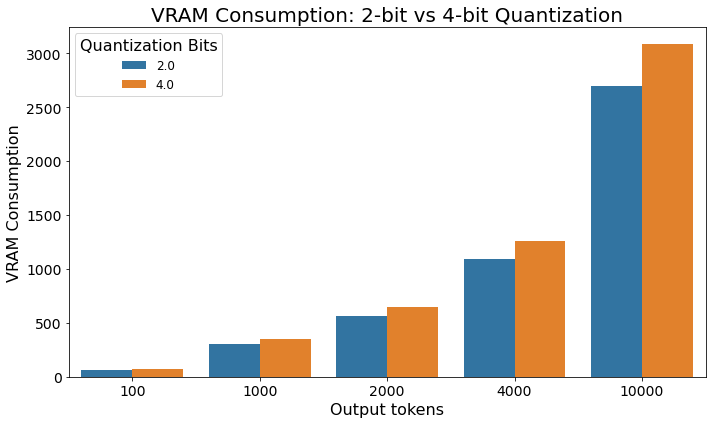

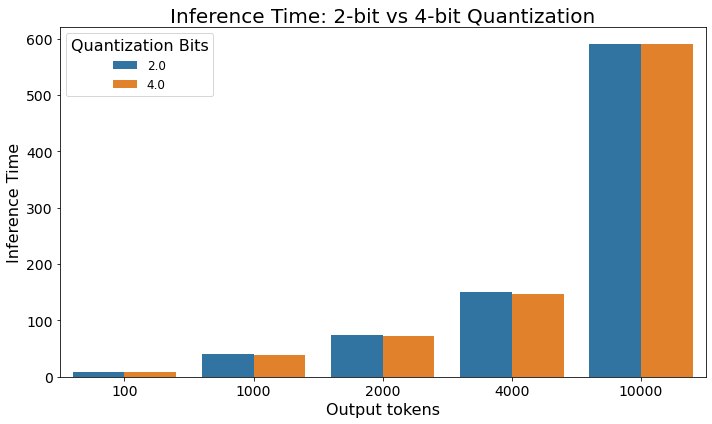

In [5]:
df_quantized = df.dropna(subset=['q_bits'])

# VRAM Consumption comparison
plt.figure(figsize=(10, 6))
sns.barplot(x='output_tokens', y='vram_consumption', hue='q_bits', data=df_quantized, palette='tab10', ci=None)
plt.title('VRAM Consumption: 2-bit vs 4-bit Quantization', fontsize=20)
plt.xlabel('Output tokens', fontsize=16)
plt.ylabel('VRAM Consumption', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(title='Quantization Bits', fontsize='large', title_fontsize='16')
plt.tight_layout()
plt.savefig('figures/mem_speed/03_vram_consumption_quantization.png', facecolor='white', transparent=False, dpi=300)
plt.show()

# Inference Time comparison
plt.figure(figsize=(10, 6))
sns.barplot(x='output_tokens', y='inference_time', hue='q_bits', data=df_quantized, palette='tab10', ci = None)
plt.title('Inference Time: 2-bit vs 4-bit Quantization', fontsize=20)
plt.xlabel('Output tokens', fontsize=16)
plt.ylabel('Inference Time', fontsize=16)
plt.legend(title='Quantization Bits', fontsize='large', title_fontsize='16')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.tight_layout()
plt.savefig('figures/mem_speed/03_inference_time_quantization.png', facecolor='white', transparent=False, dpi=300)
plt.show()

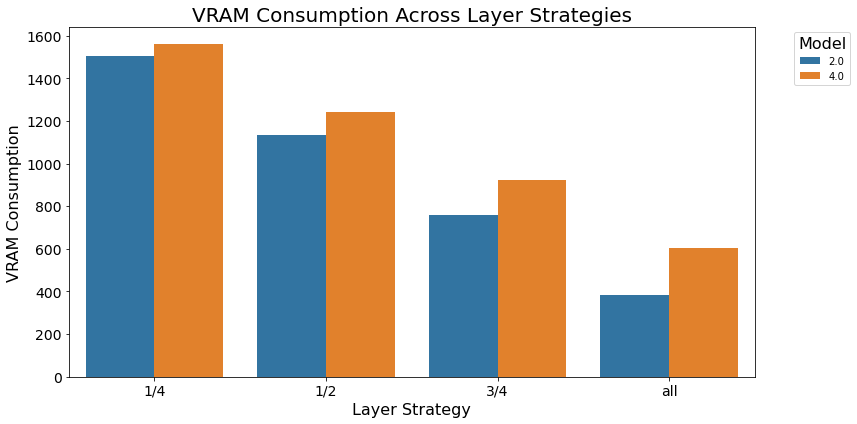

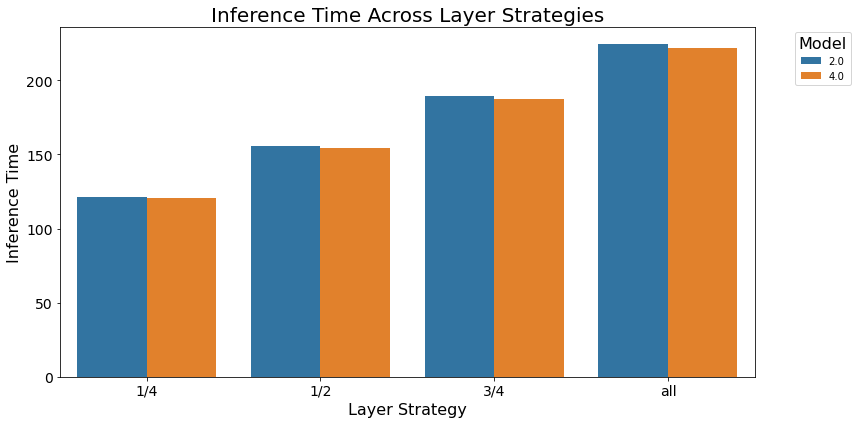

In [6]:
# VRAM Consumption
plt.figure(figsize=(12, 6))
sns.barplot(x='layer_strategy', y='vram_consumption', hue='q_bits', data=df.query('layer_strategy != "zero"'), palette='tab10', ci=None)
plt.title('VRAM Consumption Across Layer Strategies', fontsize = 20)
plt.xlabel('Layer Strategy', fontsize = 16)
plt.ylabel('VRAM Consumption',fontsize = 16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left', title_fontsize='16')
plt.tight_layout()
plt.savefig('figures/mem_speed/04_vram_consumption_layer_strategy.png', facecolor='white', transparent=False)
plt.show()

# Inference Time
plt.figure(figsize=(12, 6))
sns.barplot(x='layer_strategy', y='inference_time', hue='q_bits', data=df.query('layer_strategy != "zero"'), palette='tab10', ci=None)
plt.title('Inference Time Across Layer Strategies', fontsize=20)
plt.xlabel('Layer Strategy', fontsize=16)
plt.ylabel('Inference Time', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left', title_fontsize='16')
plt.tight_layout()
plt.savefig('figures/mem_speed/04_inference_time_layer_strategy.png', facecolor='white', transparent=False)
plt.show()

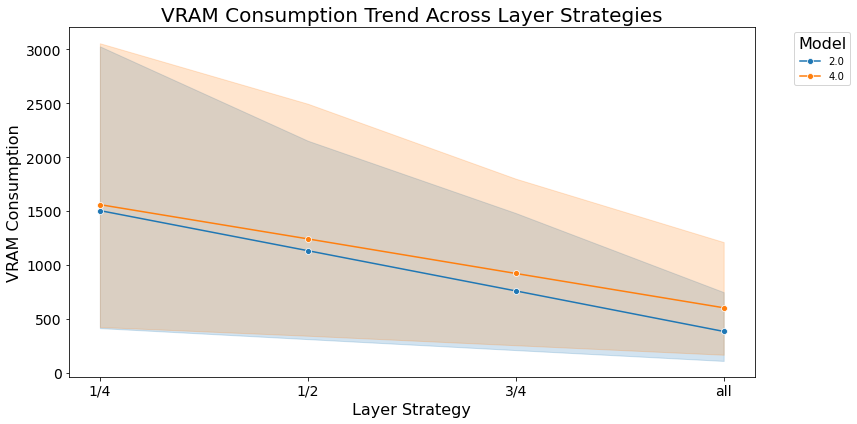

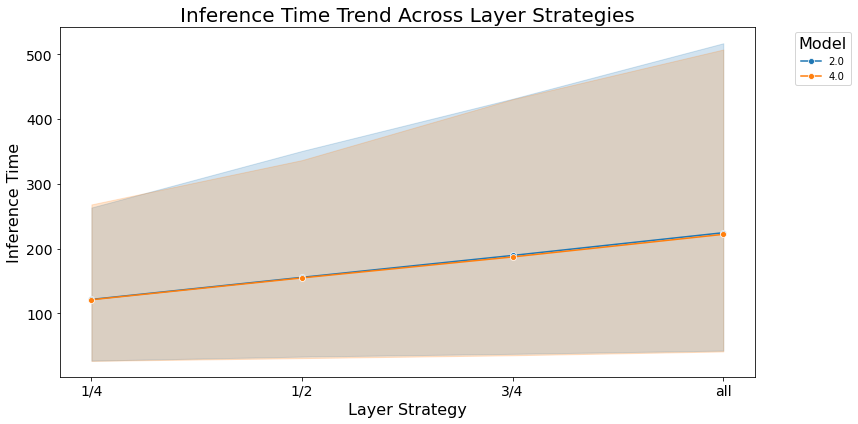

In [7]:
# VRAM Consumption trend
plt.figure(figsize=(12, 6))
for q_bit in df['q_bits'].dropna().unique():
    q_bit_data = df[df['q_bits'] == q_bit]
    sns.lineplot(x='layer_strategy', y='vram_consumption', data=q_bit_data, marker='o', label=q_bit)

plt.title('VRAM Consumption Trend Across Layer Strategies', fontsize=20)
plt.xlabel('Layer Strategy', fontsize=16)
plt.ylabel('VRAM Consumption', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left', title_fontsize='16')
plt.tight_layout()
plt.savefig('figures/mem_speed/05_vram_consumption_trend.png', facecolor='white', transparent=False)
plt.show()

# Inference Time trend
plt.figure(figsize=(12, 6))
for q_bit in df['q_bits'].dropna().unique():
    q_bit_data = df[df['q_bits'] == q_bit]
    sns.lineplot(x='layer_strategy', y='inference_time', data=q_bit_data, marker='o', label=q_bit)

plt.title('Inference Time Trend Across Layer Strategies', fontsize=20)
plt.xlabel('Layer Strategy', fontsize=16)
plt.ylabel('Inference Time', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left', title_fontsize='16')
plt.tight_layout()
plt.savefig('figures/mem_speed/05_inference_time_trend.png', facecolor='white', transparent=False)
plt.show()